# Machine Learning Model to Predict Stock Market

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 500px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Machine Learning Model: Decision Tree</th>
            <th>Output: Reality vs Prediction</th>
            <th>Input: OHLCV Apple Stock</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/output_1.png">
            </td>
            <td>
                <img src="src/output_2.png">
            </td>
            <td>
                <img src="src/input.png">
            </td>
        </tr>
    </tbody>
</table>

## Load the data

![](src/apple_watch.png)

In [1]:
path_test_file ='data/Apple.xlsx' #Se indica el path del archivo excel
path_train_file = 'data/Apple_Test.xlsx'

In [2]:
import pandas

In [3]:
df_apple= pandas.read_excel(io=path_train_file, index_col = 'Date', parse_dates=True) #Se carga el excel en una variable, indicando la columna Date como indice y tratando las fechas
df_apple_test= pandas.read_excel(io=path_test_file, index_col = 'Date', parse_dates=True)

## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the Prediction?

In [4]:
target = df_apple['Direction'] #El objetivo es la dirección (movimiento de precio)
explanatory = df_apple.drop(columns='Direction') #La explicación es la información del excel EXCEPTO direction, por eso se dropea la columna

target_test = df_apple_test['Direction']
explanatory_test = df_apple_test.drop(columns='Direction') #La explicación es la información del excel EXCEPTO direction, por eso se dropea la columna

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [5]:
from sklearn.tree import DecisionTreeClassifier # libreria que se va a usar, especificamente el arbol de decision. Usamos esto porque se quiere saber simplemente si el precio subirá o bajará

model = DecisionTreeClassifier() #Declaro el modelo


In [16]:
model.fit(X=explanatory, y=target)

TypeError: DecisionTreeClassifier.fit() got an unexpected keyword argument 'epochs'

In [7]:
model.predict(X=explanatory_test)

array(['UP', 'UP', 'UP', ..., 'UP', 'UP', 'UP'], dtype=object)

In [8]:
df_pred = target_test.to_frame()

In [9]:
df_pred['Prediction']= model.predict(X=explanatory_test)

In [10]:
df_pred

,Direction,Prediction
Date,,
2015-04-01,UP,UP
2015-04-02,UP,UP
2015-04-06,DOWN,UP
2015-04-07,DOWN,UP
2015-04-08,UP,UP
...,...,...
2022-12-23,DOWN,UP
2022-12-27,DOWN,DOWN
2022-12-28,UP,UP


### Visualize the model

[Text(0.5887784090909091, 0.9722222222222222, 'High <= 154.145\ngini = 0.492\nsamples = 216\nvalue = [94.0, 122.0]'),
 Text(0.4034090909090909, 0.9166666666666666, 'Volume <= 50779150.0\ngini = 0.369\nsamples = 41\nvalue = [10, 31]'),
 Text(0.49609375, 0.9444444444444444, 'True  '),
 Text(0.3806818181818182, 0.8611111111111112, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.42613636363636365, 0.8611111111111112, 'Open <= 143.165\ngini = 0.272\nsamples = 37\nvalue = [6, 31]'),
 Text(0.3806818181818182, 0.8055555555555556, 'Close <= 145.11\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.35795454545454547, 0.75, 'Volume <= 69565848.0\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(0.3125, 0.6944444444444444, 'Volume <= 66154800.0\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.2897727272727273, 0.6388888888888888, 'Open <= 134.455\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.26704545454545453, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),

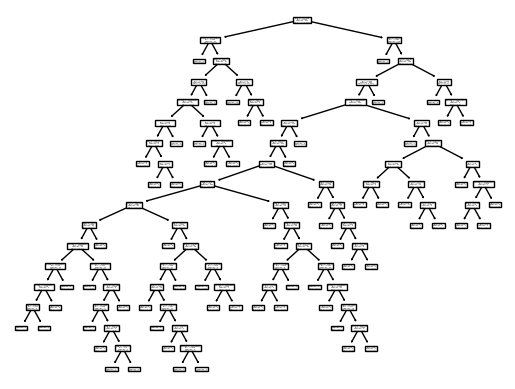

In [11]:
from sklearn.tree import plot_tree
plot_tree(decision_tree=model,feature_names=explanatory.columns.to_list())

### Evaluate the model: compare Predictions with the reality

In [12]:
comp = df_pred.Direction == df_pred.Prediction
comp.sum() / len(comp)

0.511520737327189

In [14]:
model.score(X=explanatory_test,y=target_test)

0.511520737327189

In [15]:
explanatory_test

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,31.205000,31.280001,30.775000,31.062500,162485600
2015-04-02,31.257500,31.389999,31.047501,31.330000,128880400
2015-04-06,31.117500,31.877501,31.082500,31.837500,148776000
2015-04-07,31.910000,32.029999,31.495001,31.502501,140049200
2015-04-08,31.462500,31.600000,31.242500,31.400000,149316800
...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,85438400
